In [20]:
!pip install seaborn


In [21]:
import numpy as np
import librosa
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import os

## AUDIO MATCHING


In [22]:
from scipy.signal import correlate

def audio_matching(file1, file2):
    # Tải dữ liệu âm thanh
    y1, sr1 = librosa.load(file1, sr=None)
    y2, sr2 = librosa.load(file2, sr=None)
    
    # Cross-correlation
    correlation = correlate(y1, y2)
    max_correlation = np.max(correlation)
    
    return max_correlation
# Ví dụ sử dụng
file1 = "./Music-Human/Justin-Bieber-Love-Yourself-_PURPOSE-The-Movement_.wav"
file2 = "./Music-AI/Someone-You-Loved-Justin-Bieber-_AI-Cover_.wav"
correlation = audio_matching(file1, file2)
print(f"Max correlation: {correlation}")

Max correlation: 2435.398193359375


Correlation coefficient between the two audio files: 0.9689307635065755


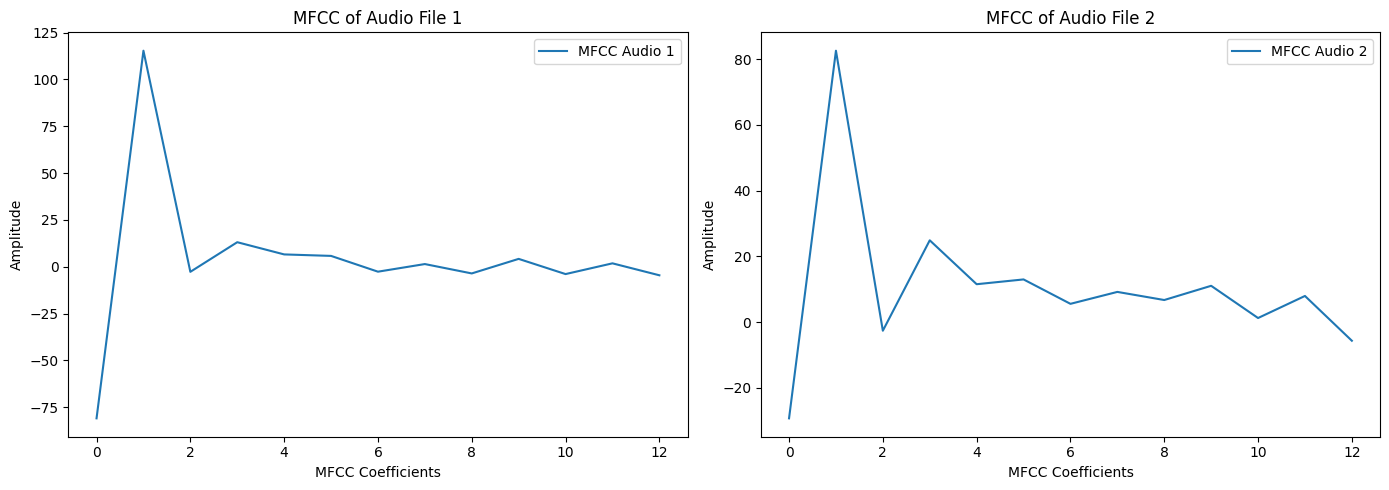

In [23]:
def extract_mfcc(audio_file):
    y, sr = librosa.load(audio_file)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    averaged_mfccs = np.mean(mfccs, axis=1)
    return averaged_mfccs

def compare_mfcc(audio_file1, audio_file2):
    mfcc1 = extract_mfcc(audio_file1)
    mfcc2 = extract_mfcc(audio_file2)
    
    correlation = np.corrcoef(mfcc1, mfcc2)[0, 1]
    print(f'Correlation coefficient between the two audio files: {correlation}')
    
    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    plt.plot(mfcc1, label='MFCC Audio 1')
    plt.title('MFCC of Audio File 1') #thường chứa thông tin âm thanh quan trọng nhất
    plt.xlabel('MFCC Coefficients') # Biên độ ở đây có thể hiểu là giá trị độ lớn của mỗi hệ số MFCC
    plt.ylabel('Amplitude')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(mfcc2, label='MFCC Audio 2')
    plt.title('MFCC of Audio File 2')
    plt.xlabel('MFCC Coefficients')
    plt.ylabel('Amplitude')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Thay thế 'audio_file1.wav' và 'audio_file2.wav' bằng đường dẫn tới các file âm nhạc của bạn
compare_mfcc('./Music-Human/Justin-Bieber-Ghost.wav', './Music-OtherArtist/set_fire_to_the_rain.wav')

Correlation coefficient between the two audio files: 0.9689307635065755


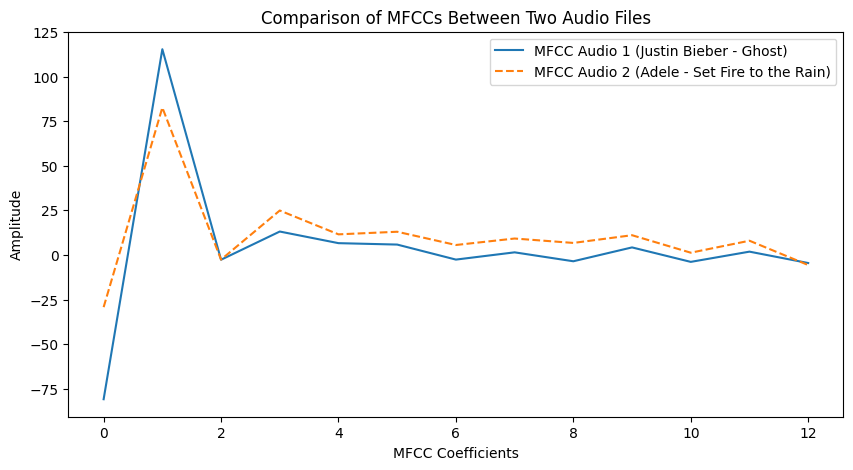

In [24]:
import numpy as np
import librosa
import matplotlib.pyplot as plt

def extract_mfcc(audio_file):
    y, sr = librosa.load(audio_file)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    averaged_mfccs = np.mean(mfccs, axis=1)
    return averaged_mfccs

def compare_mfcc(audio_file1, audio_file2):
    mfcc1 = extract_mfcc(audio_file1)
    mfcc2 = extract_mfcc(audio_file2)
    
    correlation = np.corrcoef(mfcc1, mfcc2)[0, 1]
    print(f'Correlation coefficient between the two audio files: {correlation}')
    
    plt.figure(figsize=(10, 5))
    plt.plot(mfcc1, label='MFCC Audio 1 (Justin Bieber - Ghost)')
    plt.plot(mfcc2, label='MFCC Audio 2 (Adele - Set Fire to the Rain)', linestyle='--')
    plt.title('Comparison of MFCCs Between Two Audio Files')
    plt.xlabel('MFCC Coefficients')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()

# Thay thế 'audio_file1.wav' và 'audio_file2.wav' bằng đường dẫn tới các file âm nhạc của bạn
compare_mfcc('./Music-Human/Justin-Bieber-Ghost.wav', './Music-OtherArtist/set_fire_to_the_rain.wav')


## VOICE ID

### VOICE FINGERPRINT



In [25]:
def extract_features(audio_file):
    y, sr = librosa.load(audio_file, sr=None)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)  # Tăng số lượng MFCC
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)

    # Lấy trung bình theo thời gian cho tất cả đặc trưng
    mfccs = np.mean(mfccs, axis=1)
    chroma = np.mean(chroma, axis=1)
    spectral_contrast = np.mean(spectral_contrast, axis=1)

    # Kết hợp tất cả đặc trưng thành một vector duy nhất
    features = np.hstack([mfccs, chroma, spectral_contrast])
    return features

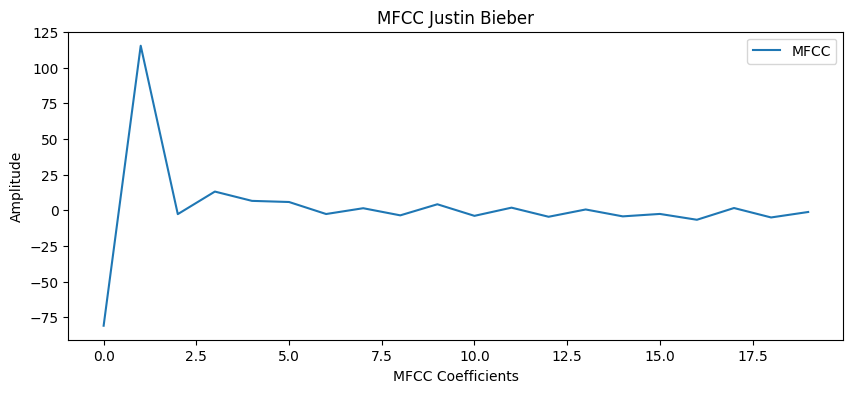

In [26]:
def plot_mfcc(audio_file):
    y, sr = librosa.load(audio_file)
    mfccs = librosa.feature.mfcc(y=y, sr=sr)
    averaged_mfccs = np.mean(mfccs, axis=1)

    plt.figure(figsize=(10, 4))
    plt.plot(averaged_mfccs, label='MFCC')
    plt.title('MFCC Justin Bieber')
    plt.xlabel('MFCC Coefficients')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()

plot_mfcc('./Music-Human/Justin-Bieber-Ghost.wav')

In [27]:
def prepare_dataset(audio_files, labels):
    features = []
    for file in audio_files:
        mfcc = extract_features(file)
        if mfcc is not None:
            features.append(mfcc)
    return np.array(features), np.array(labels)

In [28]:
# # Danh sách các file âm thanh và nhãn tương ứng (0: Human, 1: AI)
# audio_files = ["./Music-Human/Justin-Bieber-Love-Yourself-_PURPOSE-The-Movement_.wav", 
#                "./Music-Human/Justin-Bieber-Off-My-Face-_Visualizer_.wav" ,
#                "./Music-Human/Justin-Bieber-Ghost.wav" ,
#                "./Music-AI/That-Should-Be-Me-Justin-Bieber-Older-_AI-Cover_.wav", 
#                "./Music-AI/Someone-You-Loved-Justin-Bieber-_AI-Cover_.wav"]  
# labels = [0, 0, 0, 1, 1 ]  # 0 for human, 1 for AI

In [29]:
human_dir = "./Music-Human"
ai_dir = "./Music-AI"
audio_files = []
labels = []
# Get all files from human directory and label them as 0
for f in os.listdir(human_dir):
    if f.endswith('.wav'):
        audio_files.append(os.path.join(human_dir, f))
        labels.append(0)

# Get all files from AI directory and label them as 1
for f in os.listdir(ai_dir):
    if f.endswith('.wav'):
        audio_files.append(os.path.join(ai_dir, f))
        labels.append(1)


In [30]:
# Xử lý dữ liệu
features, labels = prepare_dataset(audio_files, labels)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

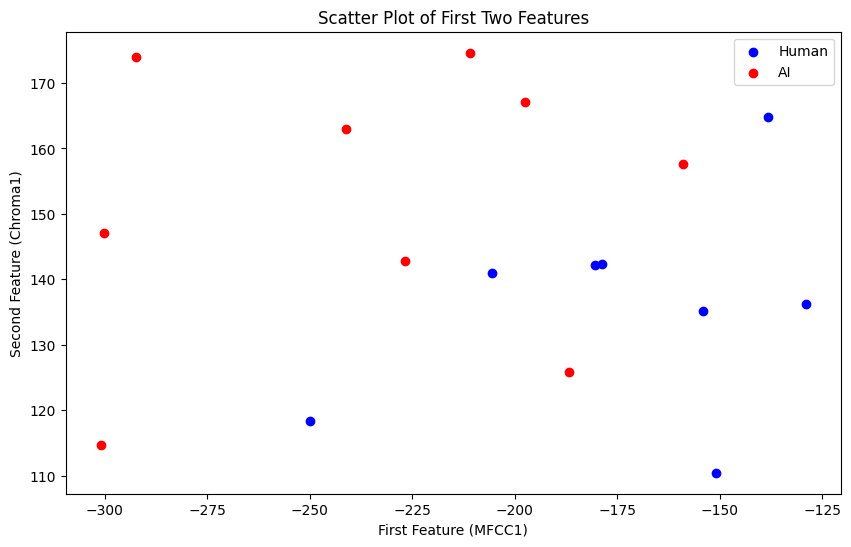

In [31]:
import matplotlib.pyplot as plt

# Giả sử đặc trưng đầu tiên là MFCC và đặc trưng thứ hai là Chroma
plt.figure(figsize=(10, 6))
plt.scatter(features[labels == 0, 0], features[labels == 0, 1], color='blue', label='Human')
plt.scatter(features[labels == 1, 0], features[labels == 1, 1], color='red', label='AI')
plt.title('Scatter Plot of First Two Features')
plt.xlabel('First Feature (MFCC1)')
plt.ylabel('Second Feature (Chroma1)')
plt.legend()
plt.show()



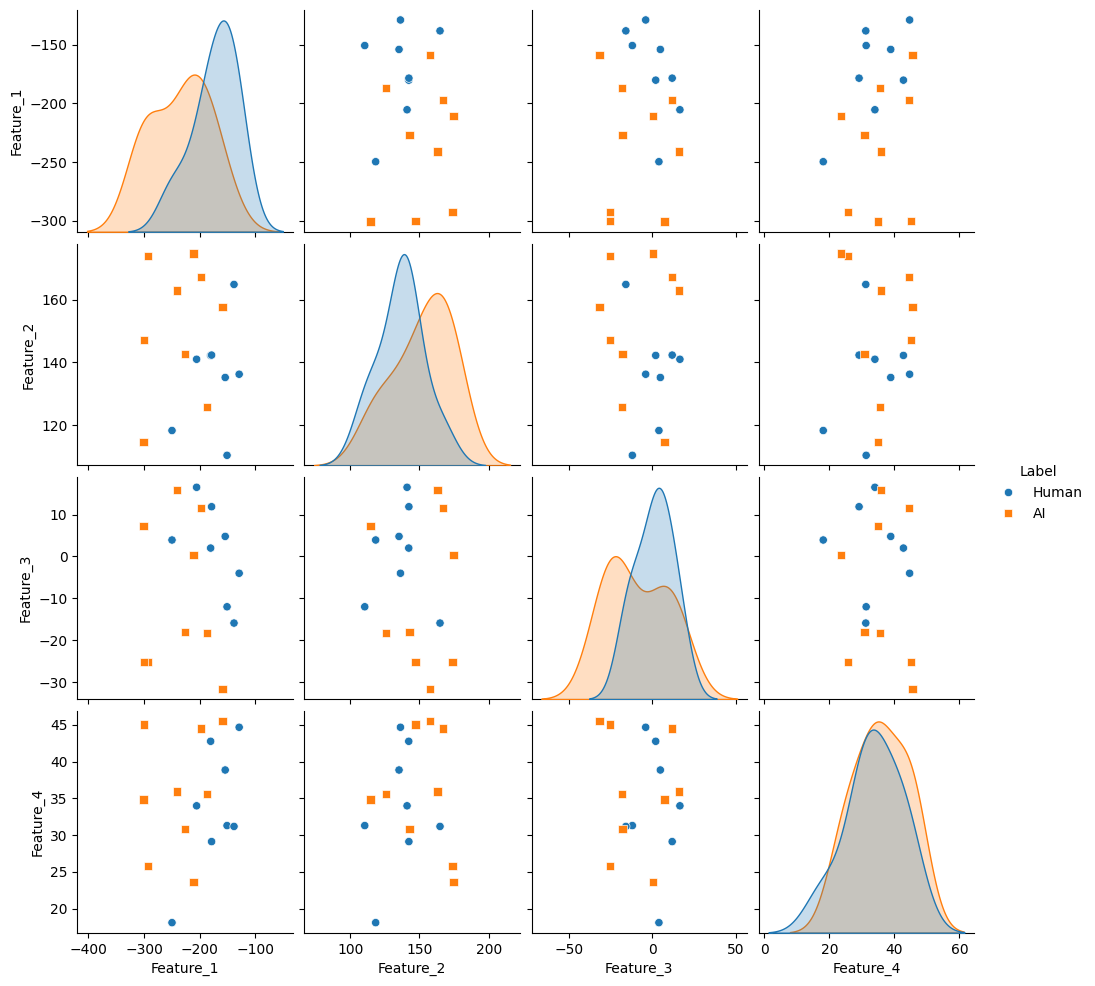

In [32]:
import seaborn as sns
import pandas as pd
import numpy as np

# Giả sử `features` là mảng numpy của bạn với các đặc trưng và `labels` là mảng các nhãn tương ứng
data = np.hstack((features, labels.reshape(-1, 1)))  # Gộp nhãn vào cuối mảng các đặc trưng
columns = [f'Feature_{i+1}' for i in range(features.shape[1])] + ['Label']  # Tạo tên cột cho DataFrame
df = pd.DataFrame(data, columns=columns)

# Đổi nhãn từ số (0,1) sang tên ('Human', 'AI') cho rõ ràng
df['Label'] = df['Label'].map({0: 'Human', 1: 'AI'})

# Vẽ pairplot với một số đặc trưng nhất định, giới hạn ở 4 đặc trưng đầu tiên để tránh quá tải hình ảnh
sns.pairplot(df[['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Label']], hue='Label', markers=["o", "s"])
plt.show()



In [33]:
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
# Tạo và huấn luyện mô hình SVM
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [35]:
# Đánh giá mô hình
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 75.00%


### VOICE MATCHING

In [36]:
def predict_new_sample(new_audio_file):
    new_feature = extract_features(new_audio_file)
    new_feature = scaler.transform([new_feature])  # Lưu ý: scaler yêu cầu input là 2D array
    prediction = model.predict(new_feature)
    return "Human" if prediction[0] == 0 else "AI"

### AI DETECTION

In [39]:
# Kiểm tra 
new_audio_file1 = "./Music/Justin-Bieber-When-i-was-your-man-AI-COVER.wav"
new_audio_file2 = "./Music/Justin Bieber - Come Around Me (Audio).mp3"
result1 = predict_new_sample(new_audio_file1)
result2 = predict_new_sample(new_audio_file2)
print(f"The voice in '{new_audio_file1}' is identified as: {result1}")
print(f"The voice in '{new_audio_file2}' is identified as: {result2}")

The voice in './Music/Justin-Bieber-When-i-was-your-man-AI-COVER.wav' is identified as: AI
The voice in './Music/Justin Bieber - Come Around Me (Audio).mp3' is identified as: Human
